<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#particular-cap." data-toc-modified-id="particular-cap.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>particular cap.</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread

sns.set()
USER_PATH = '../data/alpha/howeverover/'

Using TensorFlow backend.


In [3]:
record_df = pd.read_csv(posixpath.join(USER_PATH, 'day2', 'record_table.csv'))
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,howeverover,99,L_2018-09-29_192014.csv,R_2018-09-29_192015.csv,capture_2018_09_29_19_20_15
1,howeverover,99,L_2018-09-29_192034.csv,R_2018-09-29_192035.csv,capture_2018_09_29_19_20_36
2,howeverover,1,L_2018-09-29_192259.csv,R_2018-09-29_192300.csv,capture_2018_09_29_19_23_01
3,howeverover,2,L_2018-09-29_192616.csv,R_2018-09-29_192617.csv,capture_2018_09_29_19_26_18
4,howeverover,3,L_2018-09-29_192903.csv,R_2018-09-29_192906.csv,capture_2018_09_29_19_29_07
5,howeverover,4,L_2018-09-29_193217.csv,R_2018-09-29_193219.csv,capture_2018_09_29_19_32_19
6,howeverover,1,L_2018-09-29_193652.csv,R_2018-09-29_193653.csv,capture_2018_09_29_19_36_54
7,howeverover,2,L_2018-09-29_193923.csv,R_2018-09-29_193924.csv,capture_2018_09_29_19_39_24
8,howeverover,3,L_2018-09-29_194202.csv,R_2018-09-29_194203.csv,capture_2018_09_29_19_42_04
9,howeverover,4,L_2018-09-29_194539.csv,R_2018-09-29_194539.csv,capture_2018_09_29_19_45_40


In [4]:
needed_record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
needed_record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
2,howeverover,1,L_2018-09-29_192259.csv,R_2018-09-29_192300.csv,capture_2018_09_29_19_23_01
3,howeverover,2,L_2018-09-29_192616.csv,R_2018-09-29_192617.csv,capture_2018_09_29_19_26_18
4,howeverover,3,L_2018-09-29_192903.csv,R_2018-09-29_192906.csv,capture_2018_09_29_19_29_07
5,howeverover,4,L_2018-09-29_193217.csv,R_2018-09-29_193219.csv,capture_2018_09_29_19_32_19
6,howeverover,1,L_2018-09-29_193652.csv,R_2018-09-29_193653.csv,capture_2018_09_29_19_36_54
7,howeverover,2,L_2018-09-29_193923.csv,R_2018-09-29_193924.csv,capture_2018_09_29_19_39_24
8,howeverover,3,L_2018-09-29_194202.csv,R_2018-09-29_194203.csv,capture_2018_09_29_19_42_04
9,howeverover,4,L_2018-09-29_194539.csv,R_2018-09-29_194539.csv,capture_2018_09_29_19_45_40
10,howeverover,1,L_2018-09-29_194919.csv,R_2018-09-29_194920.csv,capture_2018_09_29_19_49_20
11,howeverover,2,L_2018-09-29_195148.csv,R_2018-09-29_195149.csv,capture_2018_09_29_19_51_50


In [ ]:
for id_, capture_dir in needed_record_df['capture_datetime'].items():
    capture_dir_path = posixpath.join(USER_PATH, 'day1', 'bb_capture', capture_dir)
    result = tk.read_result_board_info(capture_dir_path)
    print(result)
    result = tk.get_play_start_time(capture_dir_path)
    print(result)

# particular cap.

capture_2018_09_29_19_23_01

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
1/1 [==============================] - 0s
in set_hw_time)
out set_hw_time)
L_2018-09-29_192903.csv           timestamp  imu_ax  imu_ay  imu_az  imu_gx  imu_gy  imu_gz
0      1.538221e+09  9.0166 -2.7509 -2.1931  4.7607 -4.3335 -3.7842
1      1.538221e+09  9.0142 -2.7222 -2.1715  4.5166 -4.0894 -3.6621
2      1.538221e+09  9.0142 -2.7222 -2.1715  4.3335 -3.7842 -3.7842
3      1.538221e+09  9.0501 -2.7031 -2.2242  4.2114 -3.6621 -3.7842
4      1.538221e+09  9.0405 -2.7007 -2.2386  4.2114 -3.6621 -3.7842
5      1.538221e+09  9.0214 -2.7438 -2.2745  4.0283 -3.1738 -3.7231
6      1.538221e+09  9.0214 -2.7438 -2.2745  4.0283 -3.1738 -3.7231
7      1.538221e+09  9.0549 -2.7390 -2.2697  3.7231 -2.8076 -3.5400
8      1.538221e+09  9.0549 -2.7390 -2.2697  3.7231 -2.8076 -3.5400
9 

          timestamp    imu_ax    imu_ay    imu_az    imu_gx    imu_gy  \
0      1.538221e+09  9.015400 -2.736550 -2.182300  4.638650 -4.211450   
1      1.538221e+09  9.034933 -2.708667 -2.211433  4.252100 -3.702800   
2      1.538221e+09  9.038150 -2.741400 -2.272100  3.875700 -2.990700   
3      1.538221e+09  9.060250 -2.766500 -2.308625  3.784200 -2.288800   
4      1.538221e+09  9.005540 -2.811720 -2.325720  3.588880 -1.879880   
5      1.538221e+09  8.975275 -2.864625 -2.385800  3.204350 -1.708950   
6      1.538221e+09  8.965340 -2.868720 -2.418640  2.844240 -1.794420   
7      1.538221e+09  8.976450 -2.874800 -2.437275  2.319350 -2.075200   
8      1.538221e+09  8.950020 -2.873960 -2.469400  1.989780 -2.368160   
9      1.538221e+09  8.939975 -2.893400 -2.515100  1.693725 -3.051750   
10     1.538221e+09  8.945200 -2.937240 -2.532600  1.525860 -3.356940   
11     1.538221e+09  8.960560 -2.968820 -2.551740  1.464800 -3.784180   
12     1.538221e+09  8.990800 -3.009500 -2.497200  

          timestamp    imu_ax    imu_ay    imu_az    imu_gx    imu_gy  \
0      1.538221e+09 -8.516200  0.303267 -5.509067  3.011067  0.610400   
1      1.538221e+09 -8.504200  0.292100 -5.531400  2.889033  0.590000   
2      1.538221e+09 -8.517600  0.316980 -5.487960  2.563500  0.708040   
3      1.538221e+09 -8.476900  0.388320 -5.494680  2.709980  1.086460   
4      1.538221e+09 -8.426600  0.409440 -5.448720  2.685520  1.489260   
5      1.538221e+09 -8.468260  0.407480 -5.532960  2.722180  1.953100   
6      1.538221e+09 -8.613860  0.505200 -5.607240  1.586880  0.915540   
7      1.538221e+09 -8.713650  0.457300 -5.583300  0.366200 -0.732400   
8      1.538221e+09 -8.694760  0.422800 -5.540660 -0.354000 -3.063940   
9      1.538221e+09 -8.516660  0.319400 -5.526760 -0.073240 -4.553200   
10     1.538221e+09 -8.385460  0.322740 -5.537800  0.097640 -3.125020   
11     1.538221e+09 -8.373750  0.438150 -5.622800 -0.213600 -0.885000   
12     1.538221e+09 -8.417540  0.509980 -5.638360 -

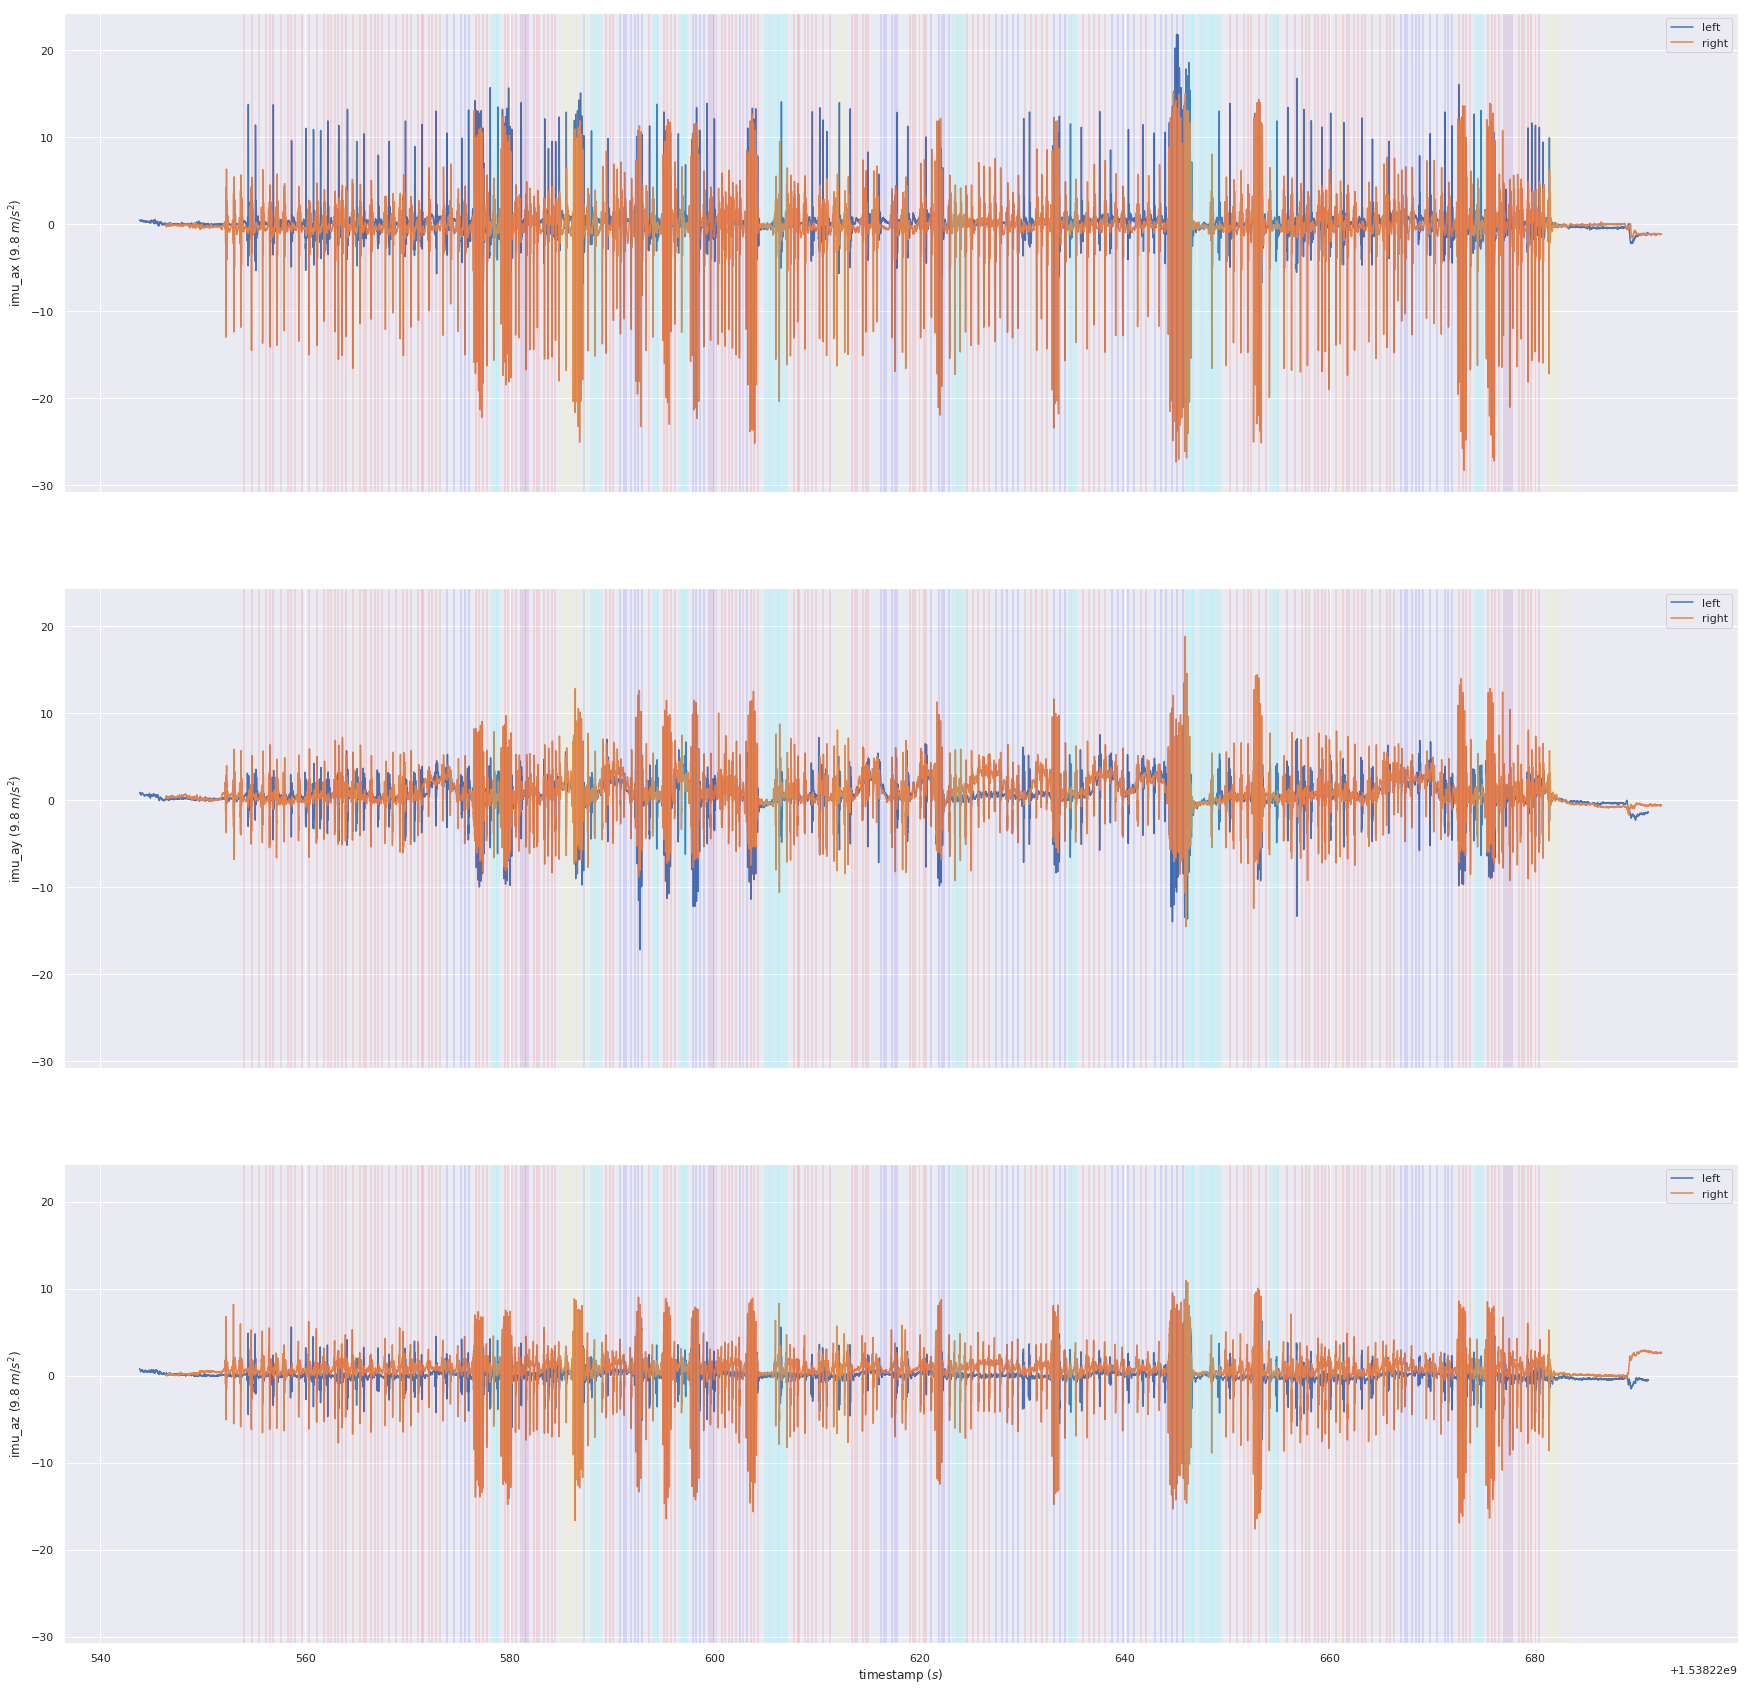

1/1 [==============================] - 0s
in set_hw_time)
out set_hw_time)
L_2018-09-29_193217.csv           timestamp  imu_ax  imu_ay  imu_az  imu_gx  imu_gy  imu_gz
0      1.538221e+09  8.7221 -3.5219 -2.1308 -2.3804  0.7935  1.5259
1      1.538221e+09  8.7484 -3.5769 -2.0853 -2.1362  0.8545  1.3428
2      1.538221e+09  8.7388 -3.5626 -2.0518 -2.0142  0.6714  1.3428
3      1.538221e+09  8.7388 -3.5626 -2.0518 -1.8921  0.9155  1.1597
4      1.538221e+09  8.7532 -3.5578 -2.1141 -1.8921  0.9155  1.1597
5      1.538221e+09  8.7867 -3.5674 -2.0901 -1.8311  0.7324  1.0986
6      1.538221e+09  8.7867 -3.5674 -2.0901 -1.8921  0.6714  0.9766
7      1.538221e+09  8.7747 -3.5674 -2.0638 -1.8921  0.6714  0.9766
8      1.538221e+09  8.7747 -3.5674 -2.0638 -1.7090  0.7324  0.9155
9      1.538221e+09  8.8035 -3.5985 -2.0710 -1.7090  0.7324  0.9155
10     1.538221e+09  8.8035 -3.5985 -2.0710 -1.4648  0.9155  0.6714
11     1.538221e+09  8.8178 -3.6296 -2.0806 -1.4648  0.9155  0.6714
12     1.538221e+

          timestamp    imu_ax    imu_ay    imu_az     imu_gx    imu_gy  \
0      1.538221e+09  8.722100 -3.521900 -2.130800  -2.380400  0.793500   
1      1.538221e+09  8.742000 -3.567367 -2.062967  -2.014167  0.813800   
2      1.538221e+09  8.775533 -3.564200 -2.098100  -1.871767  0.773100   
3      1.538221e+09  8.789100 -3.582950 -2.067400  -1.693725  0.762925   
4      1.538221e+09  8.805850 -3.632000 -2.082950  -1.373300  0.824000   
5      1.538221e+09  8.790540 -3.644920 -2.068600  -1.013180  0.915500   
6      1.538221e+09  8.775950 -3.639200 -2.106850  -0.701950  0.915500   
7      1.538221e+09  8.778120 -3.643520 -2.136080  -0.036600  0.854520   
8      1.538221e+09  8.798700 -3.694250 -2.105700   0.396700  0.656150   
9      1.538221e+09  8.812620 -3.652580 -2.127980   0.866700  0.842260   
10     1.538221e+09  8.866900 -3.733750 -2.111700   1.464800  0.885000   
11     1.538221e+09  8.868140 -3.772780 -2.124120   2.197260  1.098640   
12     1.538221e+09  8.903580 -3.75458

          timestamp    imu_ax    imu_ay    imu_az    imu_gx    imu_gy  \
0      1.538221e+09 -8.827450  0.441750 -5.650350 -0.335700  4.028350   
1      1.538221e+09 -8.852200  0.427767 -5.752467 -0.732433  3.377300   
2      1.538221e+09 -8.843367  0.446933 -5.730900 -0.895200  1.200333   
3      1.538221e+09 -8.835540  0.437680 -5.703000 -0.451680 -1.428240   
4      1.538221e+09 -8.724960  0.423760 -5.710660  0.244100 -3.332500   
5      1.538221e+09 -8.692150  0.360300 -5.686200  0.518800 -4.791250   
6      1.538221e+09 -8.666540  0.278680 -5.636880  1.110840 -5.273460   
7      1.538221e+09 -8.696700  0.204920 -5.640220  1.477040 -4.956080   
8      1.538221e+09 -8.732140  0.291140 -5.607220  1.318340 -4.809580   
9      1.538221e+09 -8.734520  0.240360 -5.644100  0.683580 -5.212420   
10     1.538221e+09 -8.634440  0.036900 -5.501900  0.305200 -4.211440   
11     1.538221e+09 -8.602400  0.011960 -5.519580  0.256340 -2.990740   
12     1.538221e+09 -8.594680 -0.039780 -5.476040 -

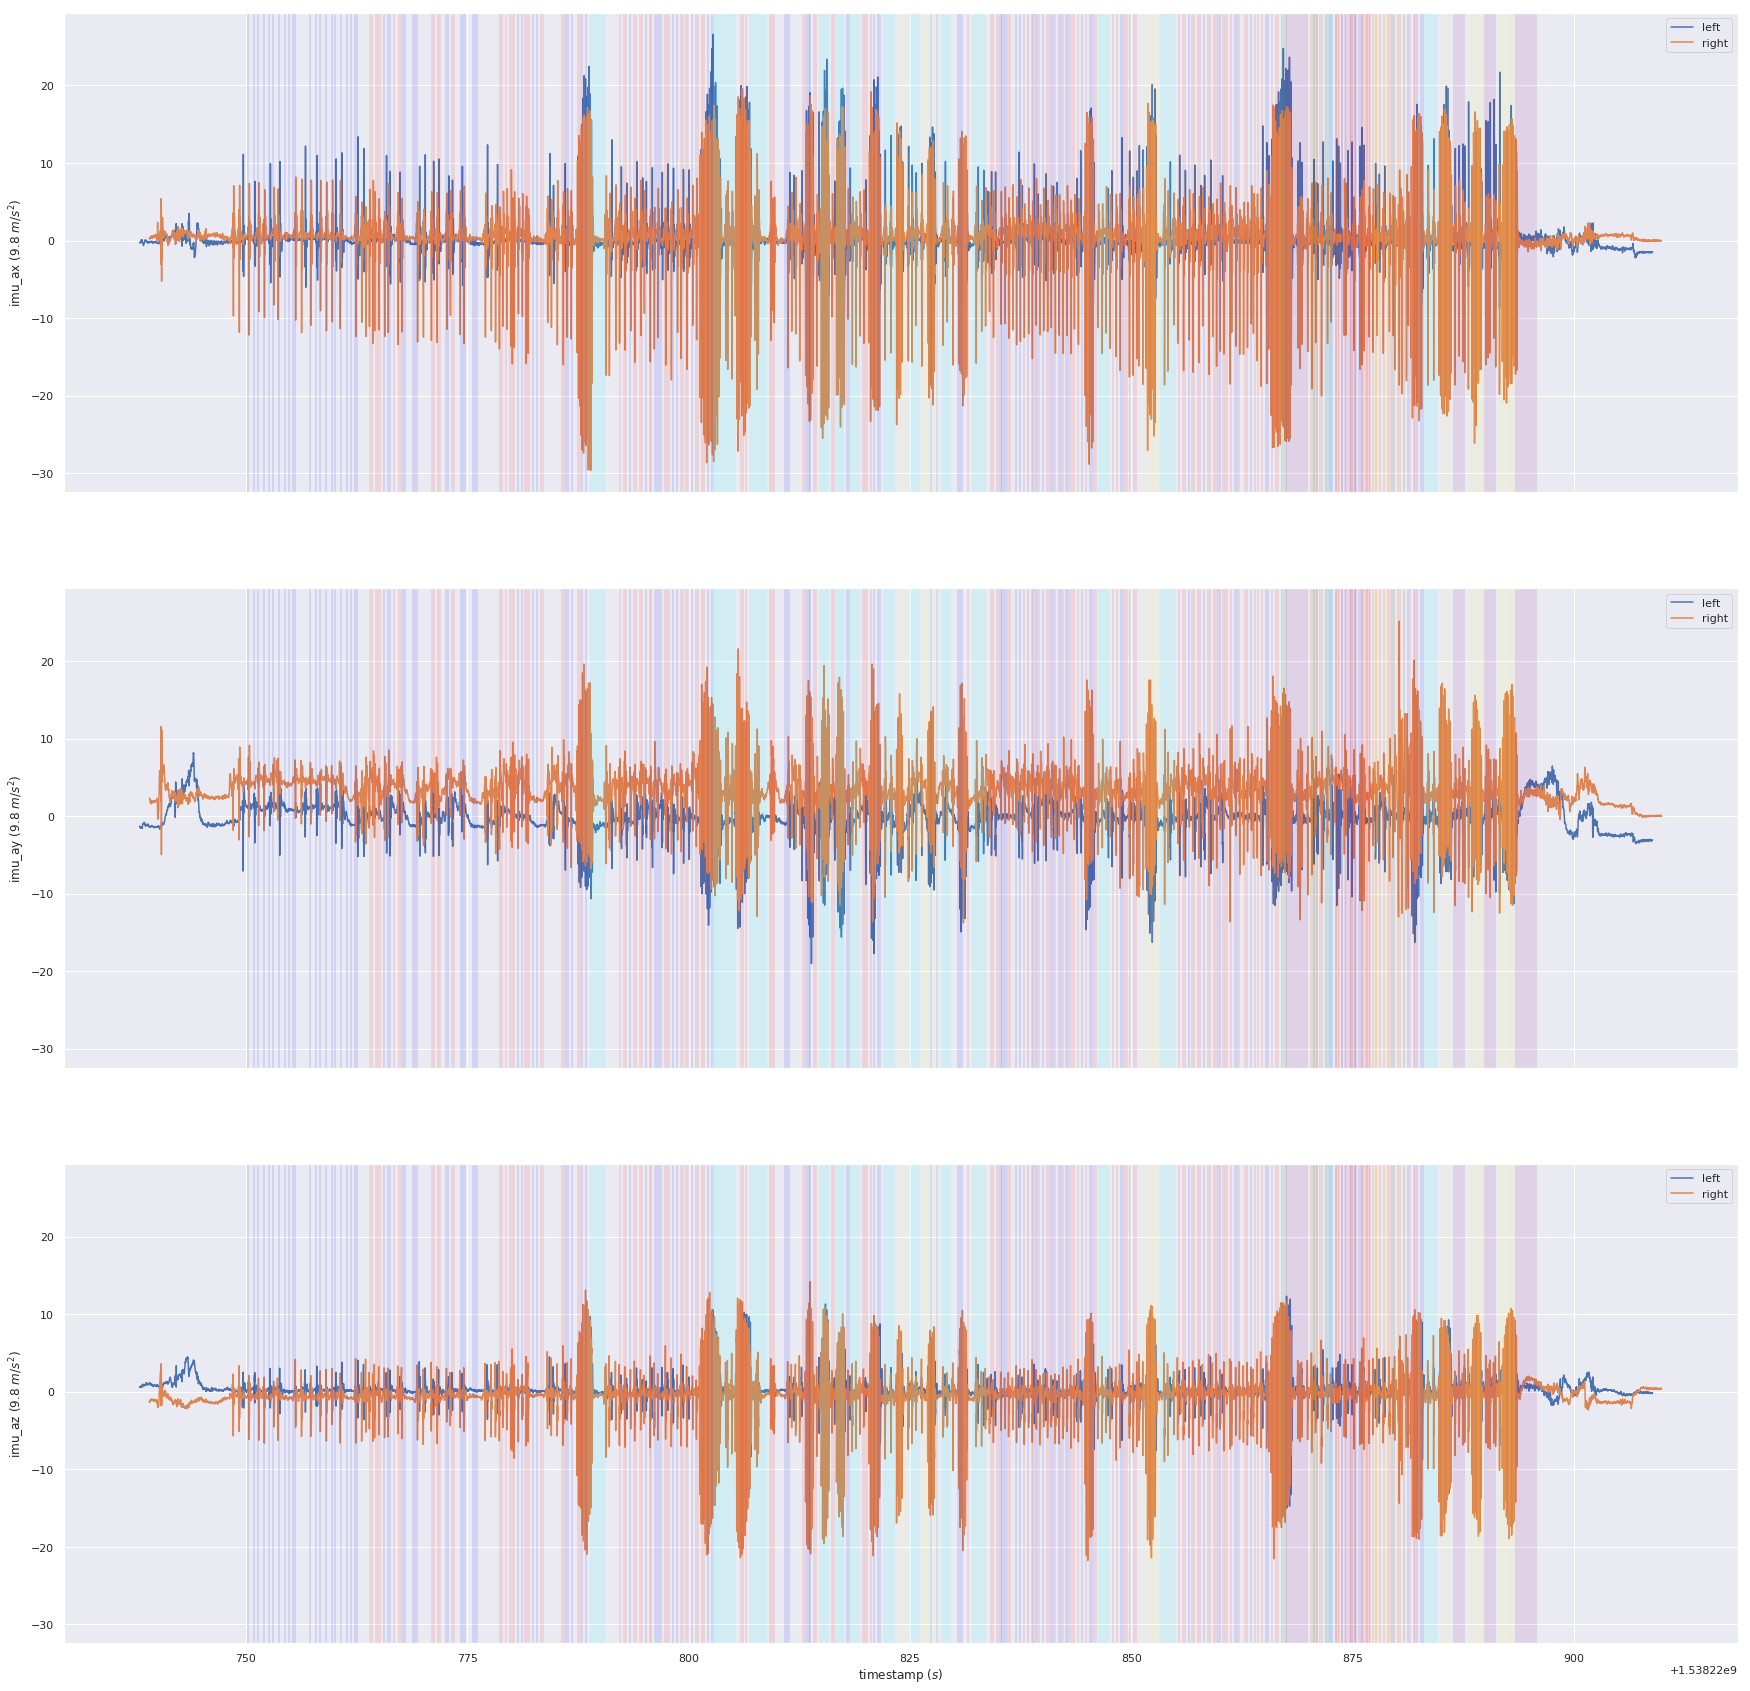

1/1 [==============================] - 0s
in set_hw_time)
out set_hw_time)
L_2018-09-29_193652.csv           timestamp  imu_ax  imu_ay  imu_az  imu_gx  imu_gy  imu_gz
0      1.538221e+09  8.3007 -4.0055 -3.0335 -1.2817 -0.4883 -0.5493
1      1.538221e+09  8.2863 -4.0007 -3.0215 -1.4038 -0.5493 -0.6104
2      1.538221e+09  8.2959 -4.0318 -3.0311 -1.3428 -0.7935 -0.6714
3      1.538221e+09  8.2959 -4.0318 -3.0311 -1.5259 -0.9155 -0.7324
4      1.538221e+09  8.2791 -3.9576 -2.9784 -1.6479 -1.2207 -0.7324
5      1.538221e+09  8.2983 -4.0103 -2.9999 -1.6479 -1.2207 -0.7324
6      1.538221e+09  8.2983 -4.0103 -2.9999 -1.6479 -1.2207 -0.7324
7      1.538221e+09  8.2935 -3.9696 -2.9951 -1.9531 -1.2207 -0.9155
8      1.538221e+09  8.2935 -3.9696 -2.9951 -1.9531 -1.2207 -0.9155
9      1.538221e+09  8.3031 -3.9887 -3.0742 -2.1362 -1.2817 -0.8545
10     1.538221e+09  8.3031 -3.9887 -3.0742 -2.1362 -1.2817 -0.8545
11     1.538221e+09  8.3031 -3.9887 -3.0742 -2.0752 -1.4648 -0.6714
12     1.538221e+

          timestamp    imu_ax    imu_ay    imu_az    imu_gx    imu_gy  \
0      1.538221e+09  8.300700 -4.005500 -3.033500 -1.281700 -0.488300   
1      1.538221e+09  8.292700 -4.021433 -3.027900 -1.424167 -0.752767   
2      1.538221e+09  8.292300 -3.986950 -2.993325 -1.724200 -1.220700   
3      1.538221e+09  8.300700 -3.983925 -3.054425 -2.075175 -1.312225   
4      1.538221e+09  8.334240 -3.995480 -3.009020 -2.258300 -1.440400   
5      1.538221e+09  8.324075 -4.023475 -2.998750 -2.441425 -1.312275   
6      1.538221e+09  8.327050 -4.074950 -2.991550 -2.502425 -1.068125   
7      1.538221e+09  8.336620 -4.095060 -3.062640 -2.343740 -0.866720   
8      1.538221e+09  8.356950 -4.101300 -3.025050 -2.014200 -0.381475   
9      1.538221e+09  8.315540 -4.071120 -3.053040 -1.708980 -0.061040   
10     1.538221e+09  8.283950 -4.055800 -3.028650 -1.510625 -0.091550   
11     1.538221e+09  8.267680 -4.012680 -2.996120 -1.513660 -0.500500   
12     1.538221e+09  8.271950 -4.025850 -2.978400 -

          timestamp     imu_ax    imu_ay    imu_az     imu_gx      imu_gy  \
0      1.538221e+09  -8.597600  0.246600 -4.561000 -30.151400   -2.197300   
1      1.538221e+09  -8.597600  0.182733 -4.562533 -29.663100   -1.892100   
2      1.538221e+09  -8.576067  0.040700 -4.486733 -28.340667   -1.363100   
3      1.538221e+09  -8.626300 -0.125267 -4.326367 -25.390633   -1.241033   
4      1.538221e+09  -8.699325 -0.170000 -4.289200 -21.102925   -1.922625   
5      1.538221e+09  -8.651067 -0.152433 -4.297600 -17.089833   -2.380333   
6      1.538221e+09  -8.457240 -0.093380 -4.295720 -13.952660   -2.490260   
7      1.538221e+09  -8.400625  0.031150 -4.366450  -9.796150   -1.312225   
8      1.538221e+09  -8.407940  0.440060 -4.465180  -7.812480    0.463840   
9      1.538221e+09  -8.510900  0.734040 -4.388580  -9.375000    2.416960   
10     1.538221e+09  -8.697160  0.492740 -4.078280 -10.583500    0.732420   
11     1.538221e+09  -9.023260 -0.072340 -4.122800  -8.813480   -4.614260   

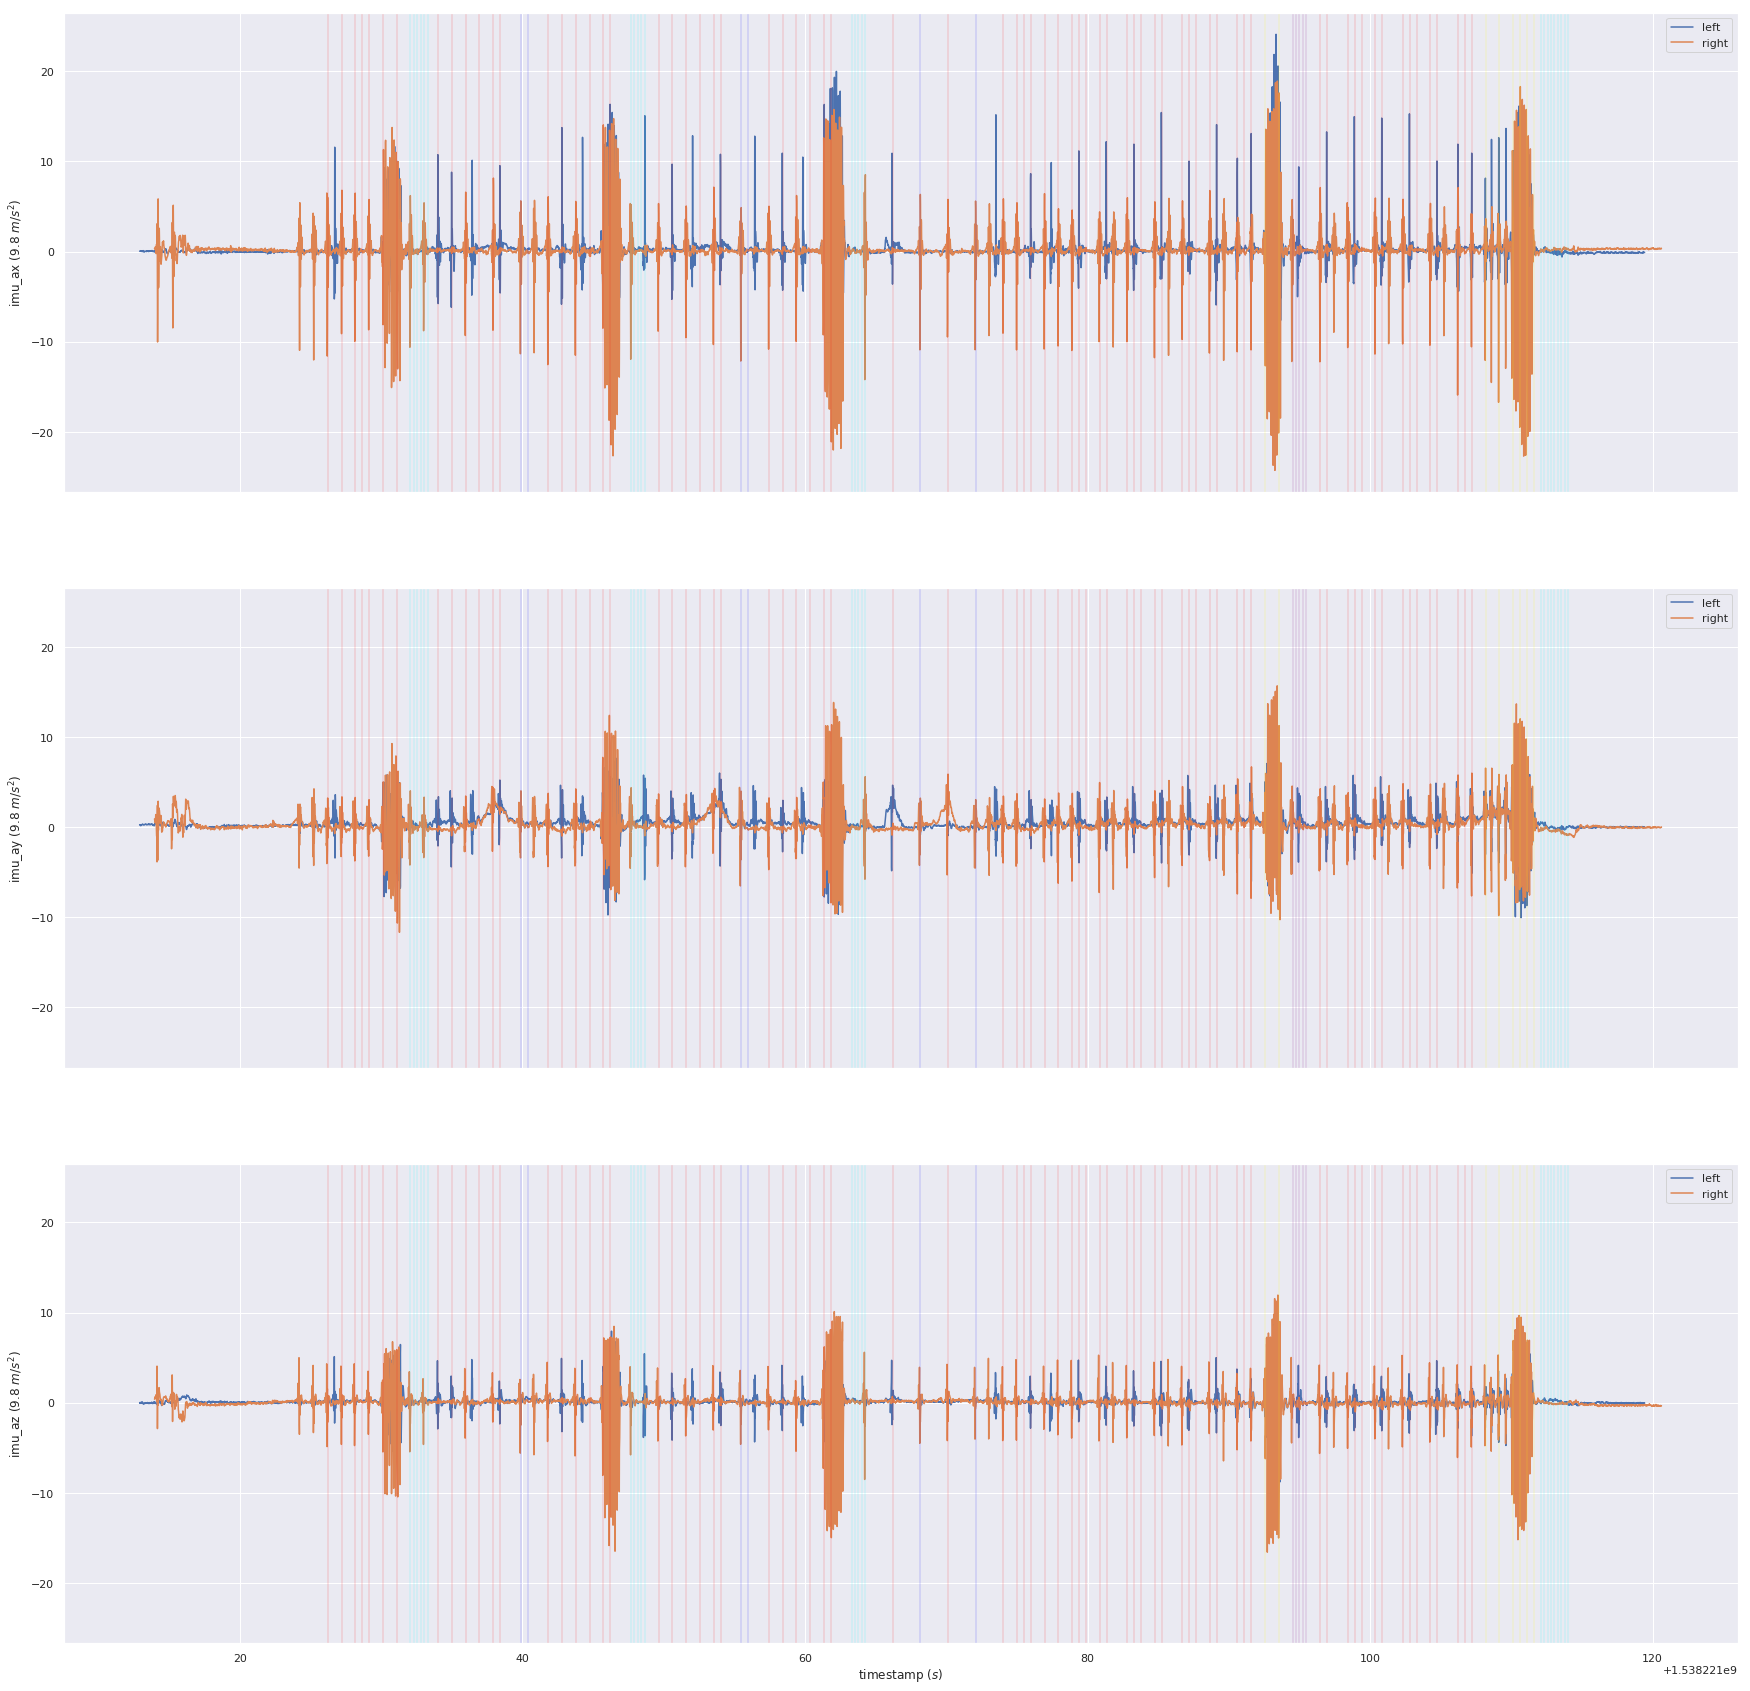

1/1 [==============================] - 0s
in set_hw_time)
out set_hw_time)
L_2018-09-29_193923.csv           timestamp  imu_ax  imu_ay  imu_az  imu_gx  imu_gy  imu_gz
0      1.538221e+09  8.2552 -4.5203 -2.2290  0.0610 -0.7935 -0.2441
1      1.538221e+09  8.2911 -4.5681 -2.2051  0.1221 -0.7324 -0.1831
2      1.538221e+09  8.2911 -4.5681 -2.2051 -0.0610 -0.6714 -0.1831
3      1.538221e+09  8.2384 -4.5274 -2.3224 -0.0610 -0.6714 -0.1831
4      1.538221e+09  8.2480 -4.4963 -2.3104  0.1831 -0.6104 -0.3052
5      1.538221e+09  8.2480 -4.4963 -2.3104  0.1221 -0.6104  0.0000
6      1.538221e+09  8.2337 -4.5107 -2.2889  0.1221 -0.6104  0.0000
7      1.538221e+09  8.2528 -4.5514 -2.2984  0.1831 -0.6714 -0.1831
8      1.538221e+09  8.2528 -4.5514 -2.2984  0.1221 -0.7324 -0.0610
9      1.538221e+09  8.2480 -4.5059 -2.3487  0.1221 -0.7324 -0.0610
10     1.538221e+09  8.2480 -4.5059 -2.3487  0.0000 -0.7935 -0.0610
11     1.538221e+09  8.2432 -4.5155 -2.3511  0.0000 -0.7935 -0.0610
12     1.538221e+

          timestamp    imu_ax    imu_ay    imu_az    imu_gx    imu_gy  \
0      1.538221e+09  8.268950 -4.545975 -2.240400  0.015275 -0.717175   
1      1.538221e+09  8.243233 -4.501100 -2.303233  0.142433 -0.610400   
2      1.538221e+09  8.251200 -4.536233 -2.315167  0.142433 -0.712067   
3      1.538221e+09  8.248600 -4.506500 -2.358275  0.000000 -0.808750   
4      1.538221e+09  8.259980 -4.529340 -2.348220  0.073240 -0.830100   
5      1.538221e+09  8.258175 -4.510075 -2.377450  0.122100 -0.839275   
6      1.538221e+09  8.262400 -4.521680 -2.378420  0.170900 -0.952160   
7      1.538221e+09  8.276175 -4.520825 -2.346300  0.274625 -0.793500   
8      1.538221e+09  8.289200 -4.517360 -2.334820  0.244160 -0.622580   
9      1.538221e+09  8.279150 -4.513075 -2.392400  0.350950 -0.381450   
10     1.538221e+09  8.284440 -4.527440 -2.297000  0.378400 -0.476040   
11     1.538221e+09  8.245650 -4.543600 -2.322950  0.518800 -0.366200   
12     1.538221e+09  8.252320 -4.559500 -2.311360  

          timestamp    imu_ax    imu_ay    imu_az     imu_gx     imu_gy  \
0      1.538221e+09 -8.890850  0.475250 -4.993100  -0.305200  -0.427200   
1      1.538221e+09 -8.875300  0.515567 -4.984733  -0.305200  -0.529000   
2      1.538221e+09 -8.829800  0.495600 -4.900900  -0.244150  -0.701900   
3      1.538221e+09 -8.778100  0.493240 -4.876500   0.158700  -0.268580   
4      1.538221e+09 -8.815900  0.496560 -4.910020   0.695800   0.402820   
5      1.538221e+09 -8.851360  0.531500 -4.861200   1.025360   1.245120   
6      1.538221e+09 -8.896900  0.552475 -4.882975   1.190200   1.464850   
7      1.538221e+09 -8.895650  0.594567 -4.863817   1.200367   1.098667   
8      1.538221e+09 -8.868150  0.667950 -4.871000   0.732400   0.976550   
9      1.538221e+09 -8.868640  0.701980 -4.832460   0.647000   0.598140   
10     1.538221e+09 -8.874800  0.690980 -4.790320   0.280760   0.488300   
11     1.538221e+09 -8.895625  0.672175 -4.839875   0.183100   0.183100   
12     1.538221e+09 -8.91

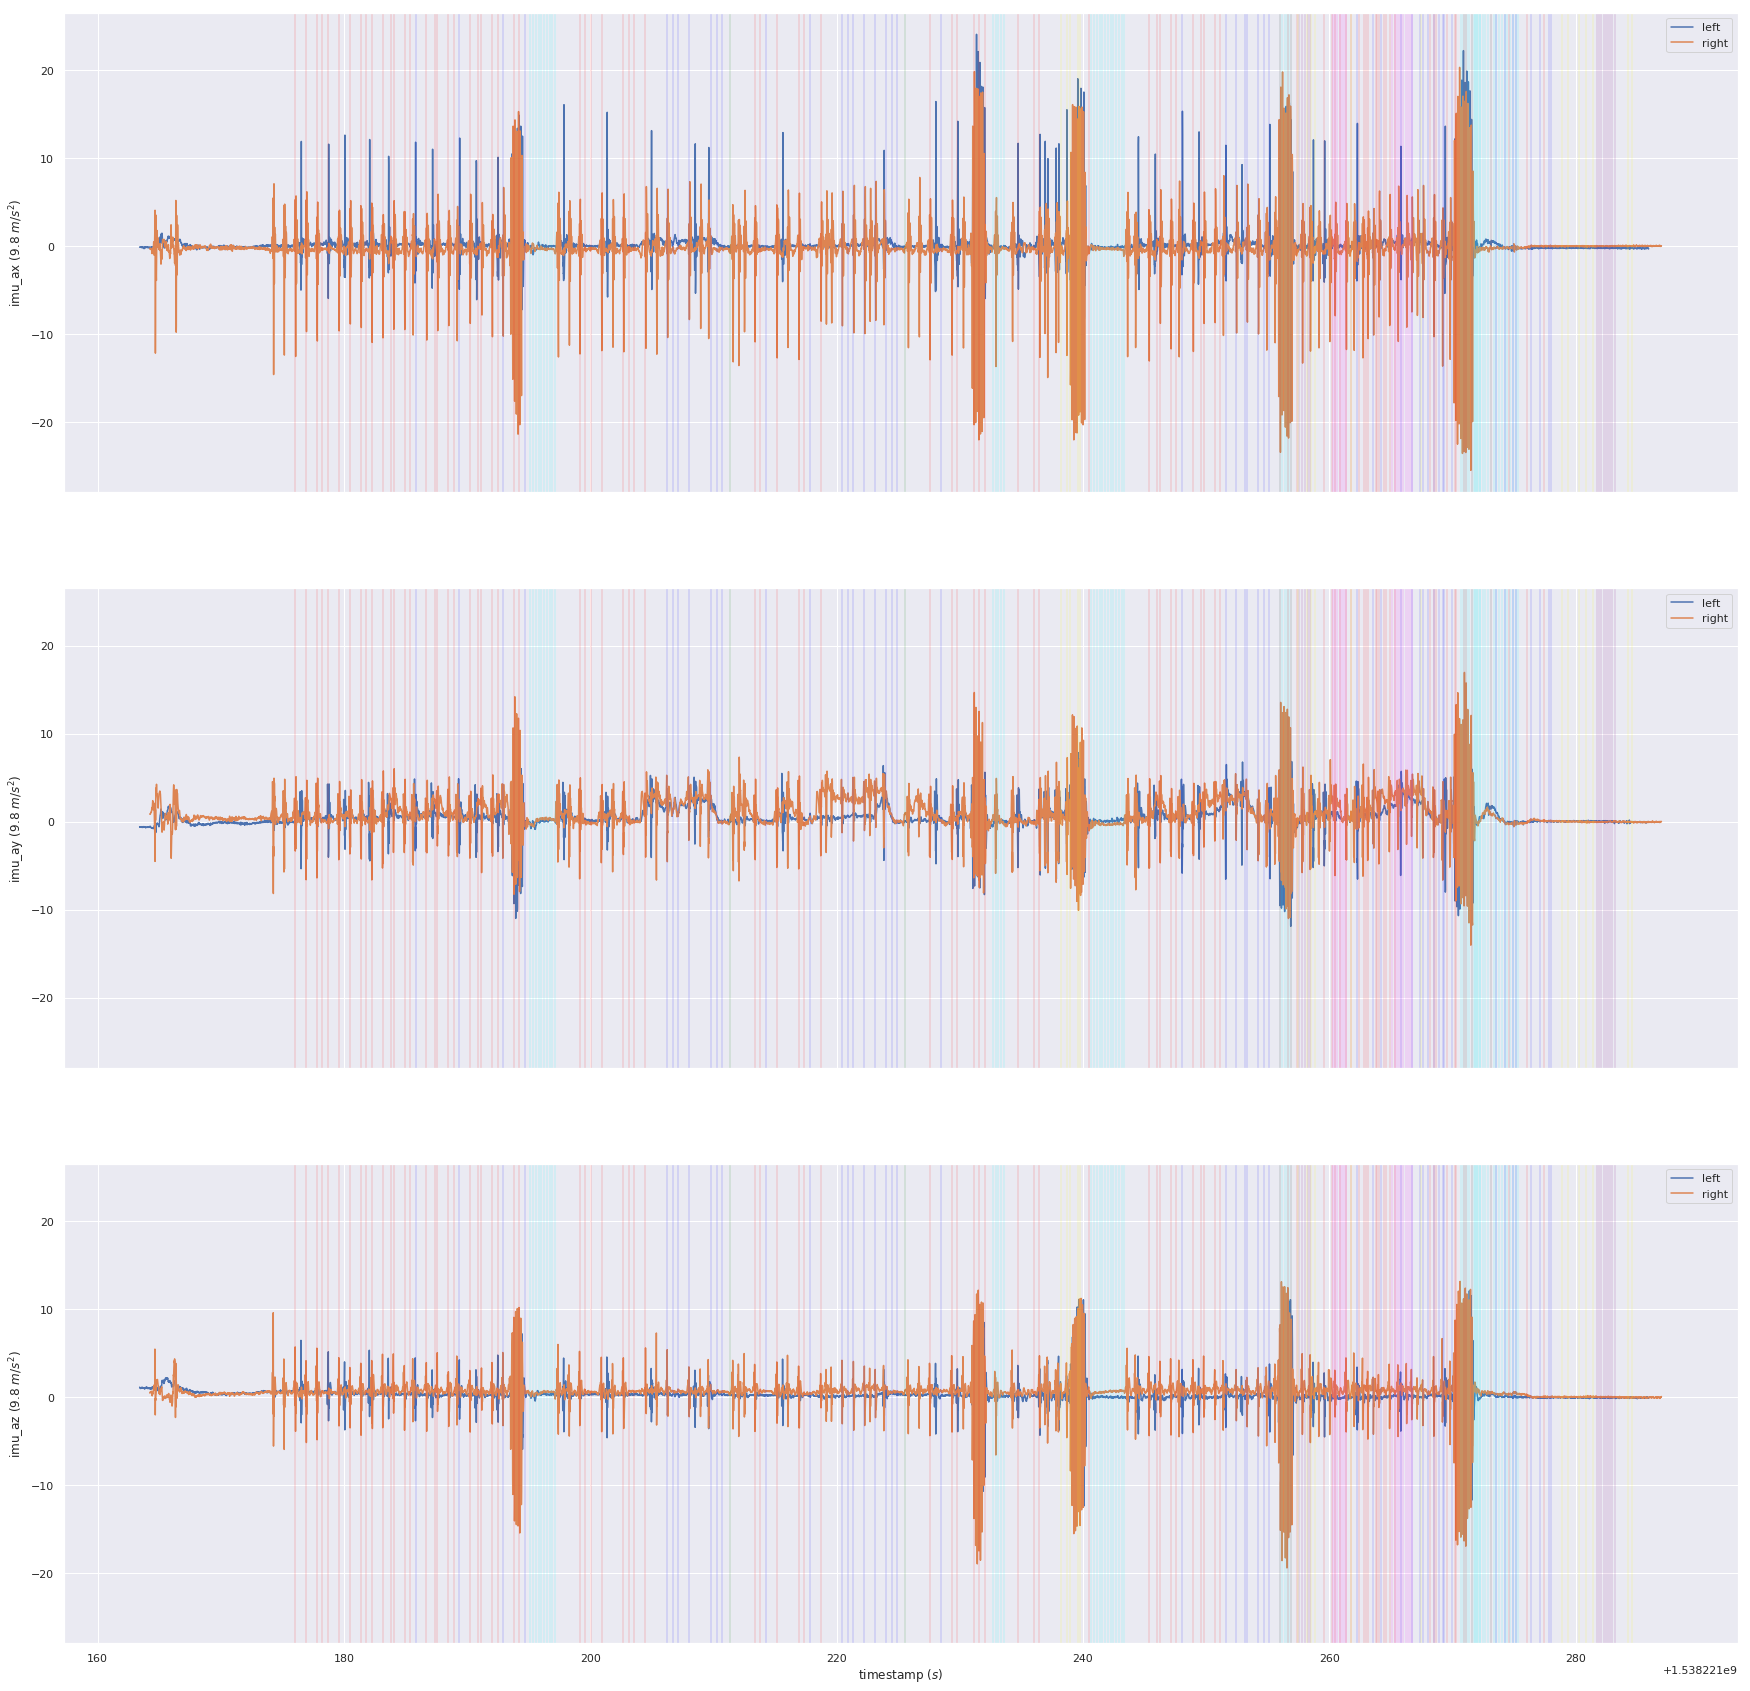

In [5]:
for id_, row in needed_record_df.iterrows():
    if id_ <= 3:
        continue
    if id_ >= 8:
        break
        
    play = tk.get_play(row)
    print(row['song_id'])

    show_cols = tk.ZERO_ADJ_COL[:3]
    fig, axes = plt.subplots(nrows=len(show_cols), ncols=1,
                             sharex=True, sharey=True, figsize=(30, 30))
    for i_, col in enumerate(show_cols):
        sns.lineplot(
            data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
        sns.lineplot(
            data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
        axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
        events = play.events
        for id_, _ in enumerate(events):
            event_time = events[id_][0]
            hit_type = events[id_][1]
            if hit_type > 0:
                axes[i_].axvline(
                    event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
    plt.xlabel('timestamp $(s)$')
    plt.show()